In [1]:
import pandas as pd
import missingno as msno
from fuzzywuzzy import fuzz
from unidecode import unidecode
import numpy as np

c:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Pipe para receber base consolidada e criar colunas de fuzzy, inclui regras que eliminam dados caso fuzzy tenha score baixo

In [3]:
df = pd.read_csv(r'App\base2.csv',dtype={'cnpj': object,'CNPJ': object,'cep': object,'CEP': object,'CNPJ_8_Digitos':object})

<ipython-input-3-fa86f462b955>:1: DtypeWarning: Columns (92,93,123,153,155,156,180) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'App\base2.csv',dtype={'cnpj': object,'CNPJ': object,'cep': object,'CEP': object,'CNPJ_8_Digitos':object})


CNES vs RF

In [4]:
#CNPJ
df[['CNPJ','cnpj']].info()
for index,row in df.iterrows():
    # if row['cnpj']:
    df.loc[index, "Fuzzy_CNPJ_CNESvsRF"] =  fuzz.ratio(unidecode(row['CNPJ'].lower()),unidecode(row['cnpj'].lower()))
    # df.loc[index, "Fuzzy_partial_ratio_CNPJ_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['CNPJ'].lower()),unidecode(row['cnpj'].lower()))
    # df.loc[index, "Fuzzy_token_sort_ratio_CNPJ_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['CNPJ'].lower()),unidecode(row['cnpj'].lower()))
    # df.loc[index, "Fuzzy_token_set_ratio_CNPJ_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['CNPJ'].lower()),unidecode(row['cnpj'].lower()))
# df[['CNPJ','cnpj','Fuzzy_CNPJ_CNESvsRF']].sort_values(by='Fuzzy_CNPJ_CNESvsRF',ascending=False).head()#,"Fuzzy_partial_ratio_Fantasia_CNESvsRF","Fuzzy_token_sort_ratio_Fantasia_CNESvsRF","Fuzzy_token_set_ratio_Fantasia_CNESvsRF"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CNPJ    21053 non-null  object
 1   cnpj    21053 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


In [5]:
df["Fuzzy_CNPJ_CNESvsRF"].value_counts()

100.0    21053
Name: Fuzzy_CNPJ_CNESvsRF, dtype: int64

In [6]:
# Nome Fantasia
df[['Nome Fantasia','fantasia']].info()#muitos nomes fantasias da RF nulos
df['Nome Fantasia'] = df['Nome Fantasia'].astype(str)
df['fantasia'] = df['fantasia'].astype(str)
for index,row in df.iterrows():
    if row['fantasia']!='nan':
        df.loc[index, "Fuzzy_Fantasia_CNESvsRF"] =  fuzz.ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['fantasia'].lower()))
        # df.loc[index, "Fuzzy_partial_ratio_Fantasia_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['fantasia'].lower()))
        # df.loc[index, "Fuzzy_token_sort_ratio_Fantasia_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['fantasia'].lower()))
        # df.loc[index, "Fuzzy_token_set_ratio_Fantasia_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['fantasia'].lower()))
df[['Nome Fantasia','fantasia','Fuzzy_Fantasia_CNESvsRF']][df['fantasia']!='nan'].sort_values(by='Fuzzy_Fantasia_CNESvsRF',ascending=False)#,"Fuzzy_partial_ratio_Fantasia_CNESvsRF","Fuzzy_token_sort_ratio_Fantasia_CNESvsRF","Fuzzy_token_set_ratio_Fantasia_CNESvsRF"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nome Fantasia  21053 non-null  object
 1   fantasia       13688 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


,Nome Fantasia,fantasia,Fuzzy_Fantasia_CNESvsRF
0,CENTRAL IMAGEM CLINICA MEDICA,CENTRAL IMAGEM CLINICA MEDICA,100.0
12374,ASSOCIACAO PESTALOZZI DE CUIABA,ASSOCIACAO PESTALOZZI DE CUIABA,100.0
12343,PSICODONTO,PSICODONTO,100.0
12349,CLINICA CORTEZ,CLINICA CORTEZ,100.0
12353,VITACLIN INTERAGINDO,VITACLIN INTERAGINDO,100.0
...,...,...,...
3283,VIDA ITU,#NOME?,0.0
3270,PRONEFRON,DAVITA,0.0
13273,CISA,PROPREV,0.0
19073,S E R TAUBATE,.,0.0


In [7]:
df[['Nome Fantasia','fantasia','Fuzzy_Fantasia_CNESvsRF']].info()#muitos nomes fantasias da RF nulos
df['fantasia'] = df['fantasia'].apply(lambda x: x.replace('nan',''))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Nome Fantasia            21053 non-null  object 
 1   fantasia                 21053 non-null  object 
 2   Fuzzy_Fantasia_CNESvsRF  13688 non-null  float64
dtypes: float64(1), object(2)
memory usage: 493.6+ KB


<AxesSubplot:>

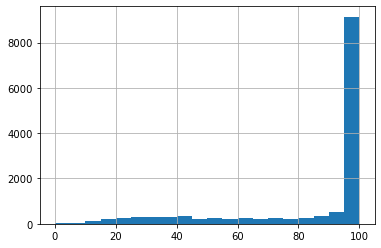

In [8]:
df['Fuzzy_Fantasia_CNESvsRF'].hist(bins=20)

In [9]:
#Razão Social
df[['Razão Social','nome:1']].info()
df['Razão Social'] = df['Razão Social'].astype(str)
df['nome:1'] = df['nome:1'].astype(str)
for index,row in df.iterrows():
    if row['nome:1']!='nan':
        df.loc[index, "Fuzzy_Razão_CNESvsRF"] =  fuzz.ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome:1'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_Razão_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome:1'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_Razão_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome:1'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_Razão_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome:1'].lower()))
# df[['Razão Social','nome:1','Fuzzy_Razão_CNESvsRF',"Fuzzy_partial_ratio_Razão_CNESvsRF","Fuzzy_token_sort_ratio_Razão_CNESvsRF","Fuzzy_token_set_ratio_Razão_CNESvsRF"]][df['nome:1']!='nan'].sort_values(by='Fuzzy_Razão_CNESvsRF',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Razão Social  21053 non-null  object
 1   nome:1        21052 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


In [10]:
df["Fuzzy_Razão_CNESvsRF"].describe()

count    21052.000000
mean        93.126781
std         13.153957
min          0.000000
25%         93.000000
50%         98.000000
75%        100.000000
max        100.000000
Name: Fuzzy_Razão_CNESvsRF, dtype: float64

<AxesSubplot:>

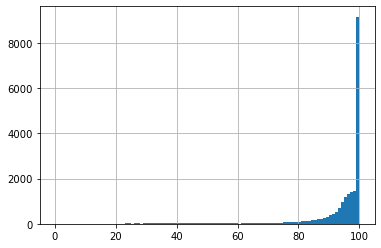

In [11]:
df["Fuzzy_Razão_CNESvsRF"].hist(bins=100)

In [12]:
df[['Logradouro','logradouro']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Logradouro  21053 non-null  object
 1   logradouro  19095 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


In [13]:
#Logradouro
df[['Logradouro','logradouro']].info()
df['Logradouro'] = df['Logradouro'].astype(str)
df['logradouro'] = df['logradouro'].astype(str)
for index,row in df.iterrows():
    if row['logradouro']!='nan':
        df.loc[index, "Fuzzy_Logradouro_CNESvsRF"] =  fuzz.ratio(unidecode(row['Logradouro'].lower()),unidecode(row['logradouro'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_Logradouro_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Logradouro'].lower()),unidecode(row['logradouro'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_Logradouro_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Logradouro'].lower()),unidecode(row['logradouro'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_Logradouro_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Logradouro'].lower()),unidecode(row['logradouro'].lower()))
# df[['Logradouro','logradouro','Fuzzy_Logradouro_CNESvsRF',"Fuzzy_partial_ratio_Logradouro_CNESvsRF","Fuzzy_token_sort_ratio_Logradouro_CNESvsRF","Fuzzy_token_set_ratio_Logradouro_CNESvsRF"]][df['logradouro']!='nan'].sort_values(by='Fuzzy_Logradouro_CNESvsRF',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Logradouro  21053 non-null  object
 1   logradouro  19095 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


In [14]:
df['logradouro'] = df['logradouro'].apply(lambda x: x.replace('nan',''))

<AxesSubplot:>

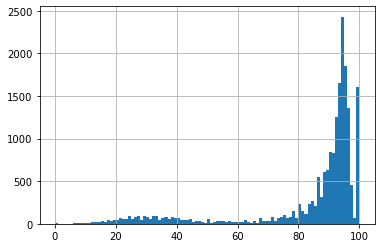

In [15]:
df["Fuzzy_Logradouro_CNESvsRF"].hist(bins=100)

In [16]:
#Numero do endereço
df[['Número do endereço','numero']].info()
df['Número do endereço'] = df['Número do endereço'].astype(str)
df['numero'] = df['numero'].astype(str)
for index,row in df.iterrows():
    if row['numero']!='nan':
        df.loc[index, "Fuzzy_Número_CNESvsRF"] =  fuzz.ratio(unidecode(row['Número do endereço'].lower()),unidecode(row['numero'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_Número_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Número do endereço'].lower()),unidecode(row['numero'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_Número_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Número do endereço'].lower()),unidecode(row['numero'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_Número_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Número do endereço'].lower()),unidecode(row['numero'].lower()))
# df[['Número do endereço','numero','Fuzzy_Número_CNESvsRF',"Fuzzy_partial_ratio_Número_CNESvsRF","Fuzzy_token_sort_ratio_Número_CNESvsRF","Fuzzy_token_set_ratio_Número_CNESvsRF"]][df['numero']!='nan'].sort_values(by='Fuzzy_Número_CNESvsRF',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Número do endereço  21049 non-null  object
 1   numero              19084 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


In [17]:
df['numero'] = df['numero'].apply(lambda x: x.replace('nan',''))


<AxesSubplot:>

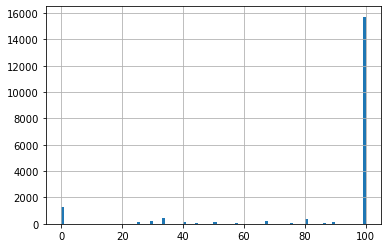

In [18]:
df["Fuzzy_Número_CNESvsRF"].hist(bins=100)

In [19]:
#Município
df[['Município','municipio']].info()
df['Município'] = df['Município'].astype(str)
df['municipio'] = df['municipio'].astype(str)
for index,row in df.iterrows():
    if row['municipio']!='nan':
        df.loc[index, "Fuzzy_Município_CNESvsRF"] =  fuzz.ratio(unidecode(row['Município'].lower()),unidecode(row['municipio'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_Município_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Município'].lower()),unidecode(row['municipio'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_Município_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Município'].lower()),unidecode(row['municipio'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_Município_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Município'].lower()),unidecode(row['municipio'].lower()))
# df[['Município','municipio','Fuzzy_Município_CNESvsRF',"Fuzzy_partial_ratio_Município_CNESvsRF","Fuzzy_token_sort_ratio_Município_CNESvsRF","Fuzzy_token_set_ratio_Município_CNESvsRF"]][df['municipio']!='nan'].sort_values(by='Fuzzy_Município_CNESvsRF',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  21053 non-null  object
 1   municipio  19094 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


In [20]:
df['municipio'] = df['municipio'].apply(lambda x: x.replace('nan',''))


<AxesSubplot:>

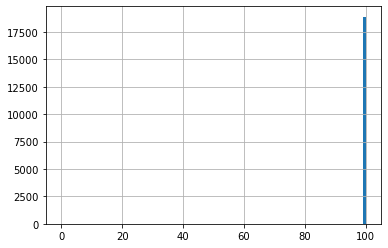

In [21]:
df['Fuzzy_Município_CNESvsRF'].hist(bins=100)

In [22]:
#UF
df[['UF','uf']].info()
df['UF'] = df['UF'].astype(str)
df['uf'] = df['uf'].astype(str)
for index,row in df.iterrows():
    if row['uf']!='nan':
        df.loc[index, "Fuzzy_UF_CNESvsRF"] =  fuzz.ratio(unidecode(row['UF'].lower()),unidecode(row['uf'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_UF_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['UF'].lower()),unidecode(row['uf'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_UF_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['UF'].lower()),unidecode(row['uf'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_UF_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['UF'].lower()),unidecode(row['uf'].lower()))
# df[['UF','uf','Fuzzy_UF_CNESvsRF',"Fuzzy_partial_ratio_UF_CNESvsRF","Fuzzy_token_sort_ratio_UF_CNESvsRF","Fuzzy_token_set_ratio_UF_CNESvsRF"]][df['uf']!='nan'].sort_values(by='Fuzzy_UF_CNESvsRF',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UF      21053 non-null  object
 1   uf      19094 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


In [23]:
df['uf'] = df['uf'].apply(lambda x: x.replace('nan',''))


<AxesSubplot:>

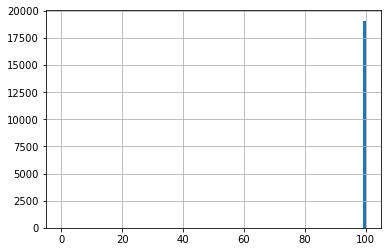

In [24]:
df['Fuzzy_UF_CNESvsRF'].hist(bins=100)

## CNES vs Google Places

In [25]:
# df[['PARAM_NOME','Nome Fantasia','Razão Social']][df['PARAM_NOME'].notnull()].sample(5)
# (df['PARAM_NOME']==df['Nome Fantasia']).value_counts()

In [26]:
df[['Nome Fantasia','gmapsCompanyName']].info()
df['Nome Fantasia'] = df['Nome Fantasia'].astype(str)
df['gmapsCompanyName'] = df['gmapsCompanyName'].astype(str)
for index,row in df.iterrows():
    if row['gmapsCompanyName']!='nan':
        # df.loc[index, "Fuzzy_Nome_CNESvsGMN"] =  fuzz.ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['gmapsCompanyName'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_Nome_CNESvsGMN"] =  fuzz.partial_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['gmapsCompanyName'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_Nome_CNESvsGMN"] =  fuzz.token_sort_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['gmapsCompanyName'].lower()))
        df.loc[index, "Fuzzy_token_set_ratio_Nome_CNESvsGMN"] =  fuzz.token_set_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['gmapsCompanyName'].lower()))
# df[['CNPJ','Nome Fantasia','gmapsCompanyName','Fuzzy_Nome_CNESvsGMN',"Fuzzy_partial_ratio_Nome_CNESvsGMN","Fuzzy_token_sort_ratio_Nome_CNESvsGMN","Fuzzy_token_set_ratio_Nome_CNESvsGMN"]][df['gmapsCompanyName']!='nan'].sort_values(by='Fuzzy_Nome_CNESvsGMN',ascending=False).to_excel('fuzzy_fantasia3.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nome Fantasia     21053 non-null  object
 1   gmapsCompanyName  265 non-null    object
dtypes: object(2)
memory usage: 329.1+ KB


In [27]:
# df[['Nome Fantasia','gmapsCompanyName',"Fuzzy_Nome_CNESvsGMN"]].info()
df['gmapsCompanyName'] = df['gmapsCompanyName'].apply(lambda x: x.replace('nan',''))



<AxesSubplot:>

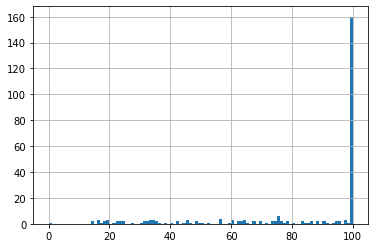

In [28]:
df["Fuzzy_token_set_ratio_Nome_CNESvsGMN"].hist(bins=100)
# df["Fuzzy_Nome_CNESvsGMN"].value_counts()

Juntando varias colunas do CNES para compor uma coluna de endereço só e fazer o fuzzy com a coluna acima do google

In [29]:
df['Full_address_CNES'] = df['Logradouro'] + ', ' + df['Número do endereço'] + ' - '+ df['Município'] +' - '+df['UF']+', '+df['CEP']

In [30]:
#exportando arquivo excel para fazer checagem manual

In [31]:
df[['CNPJ','Nome Fantasia','gmapsCompanyName','Full_address_CNES','gmapsAddress','URL Site','URL GMN',"Fuzzy_token_set_ratio_Nome_CNESvsGMN"]][df['Fuzzy_token_set_ratio_Nome_CNESvsGMN'].notnull()].sort_values(by='Fuzzy_token_set_ratio_Nome_CNESvsGMN',ascending=False)#.to_excel('fuzzy_sites.xlsx')

,CNPJ,Nome Fantasia,gmapsCompanyName,Full_address_CNES,gmapsAddress,URL Site,URL GMN,Fuzzy_token_set_ratio_Nome_CNESvsGMN
10242,21456452000152,CLINICA PROTHEUS,Clinica Protheus - PSICOLOGIA e PSIQUIATRIA e...,"RUA XV DE NOVEMBRO, 266 - CURITIBA - PR, 80020310","Rua XV de Novembro, 266 (Centro) 80020-919 - C...",http://www.clinicaprotheus.com.br/,https://www.google.com.br/maps/place/Clinica+P...,100.0
7803,32915458000167,CMESAUDE,CMESaúde - Clínica de Monitoramento Educacion...,"RUI BARBOSA, 1868 - NATAL - RN, 59056300","Av. Rui Barbosa, 1868, HC Plaza Torre 2 sala 1...",https://cmesaude.com.br/,https://www.google.com.br/maps/place/CMESa%C3%...,100.0
11744,03094394000697,CLINICA MAIA,Clínica Maia,"RODOVIA REGIS BITTENCOURT, 3450 - TABOAO DA SE...","R. Acácio Ferreira, 3450 - Jardim Mirna, Taboã...",https://www.clinicamaia.com.br/,https://www.google.com.br/maps/place/Cl%C3%ADn...,100.0
11993,04251273000160,CENARIUM CLINICA DE PSIQUIATRIA E PSICOTERAPIA,Clínica Cenarium,"RUA 9B, 129 - GOIANIA - GO, 74110120","R. 9-B, 4 - Andar 129 - St. Oeste, Goiânia - G...",https://www.cenariumclinica.com.br/,https://www.google.com.br/maps/place/Cl%C3%ADn...,100.0
12207,04841170000230,MHR TIJUCA,MHR Psicólogos e Saúde - Tijuca,"RUA CONDE DE BONFIM, 211 - RIO DE JANEIRO - RJ...","Rua Conde de Bonfim, 211 - 410 - Tijuca, Rio d...",http://www.mhrpsicologos.com.br/,https://www.google.com.br/maps/place/MHR+Psic%...,100.0
...,...,...,...,...,...,...,...,...
1427,19879255000102,CEMED ESSENCIAL,Clínica Pedro Cavalcanti | Unidade Currais No...,"RUA CAPITAL JOSE DA PENHA, 89 - CURRAIS NOVOS ...","R. Cap. José da Penha, 81, Currais Novos - RN,...",http://www.labcemed.com.br/,https://www.google.com.br/maps/place/Cl%C3%ADn...,16.0
19043,31468229000189,VILA VERDE,"Av. Alberto Torres, 382 - Parque Conselheiro ...","AVENIDA ALBERTO TORRES, 382 - CAMPOS DOS GOYTA...","Av. Alberto Torres, 382 - Parque Conselheiro T...",http://vilaverdejf.com.br/,https://www.google.com.br/maps/place/Av.+Alber...,16.0
13856,44863959000630,ESPACO VIVER BEM,Prudente Home Trade Center,"AV CORONEL JOSE SOARES MARCONDES, 3295 - PRESI...","Av. Cel. José Soares Marcondes, 3700 - Jardim ...",http://www.superestrela.com.br/,https://www.google.com.br/maps/place/Prudente+...,14.0
14674,07284484000197,HEAD,"R. Prof. Almeida Cousin, 125 - Enseada do Suá","RUA PROFESSOR ALMEIDA COUSIN, 125 - VITORIA - ...","R. Prof. Almeida Cousin, 125 - Enseada do Suá,...",http://www.alterna.com.br/,https://www.google.com.br/maps/place/R.+Prof.+...,14.0


### Limpeza de dados do google
- Nome Fantasia vs gmapsCompanyName , errado remove gmapsCompanyName
- Full Addres vs gmapsAddress, NÃO FAZ NADA
- Nome Fantasia vs site, site errado remove sites, ratings, cats (limpa tudo)

In [32]:
df_GMN_check = pd.read_excel('fuzzy_sites.xlsx',dtype={'CNPJ': object})
# df_GMN_check.info()

# df_GMN_check = df_GMN_check[['CNPJ','Fuzzy_token_set_ratio_Nome_CNESvsGMN','Nome Fantasia','gmapsCompanyName','Correto']]
dict_nome_GMN_check = df_GMN_check.set_index('CNPJ')['Nome_Correto'].to_dict()
dict_End_GMN_check = df_GMN_check.set_index('CNPJ')['End_correto'].to_dict()
dict_Site_GMN_check = df_GMN_check.set_index('CNPJ')['Site_Certo'].to_dict()



In [33]:
#Nomes
df['Nome_google_correct'] = df['CNPJ'].map(dict_nome_GMN_check)

In [34]:
df['Nome_google_correct'].value_counts()#.info()

1.0    229
0.0     36
Name: Nome_google_correct, dtype: int64

In [35]:
for index,row in df.iterrows():
    if row['Nome_google_correct']==0:
        df.loc[index, "Fuzzy_token_set_ratio_Nome_CNESvsGMN"] = np.NaN
        df.loc[index, "gmapsCompanyName"] = np.NaN

In [36]:
# Sites
df['Site_google_correct'] = df['CNPJ'].map(dict_Site_GMN_check)

In [37]:
df['Site_google_correct'].value_counts()#.info()

1.0    241
0.0     24
Name: Site_google_correct, dtype: int64

In [38]:
crawlers_col_list = ['Cat Geriatrico',
 'Cat Adulto',
 'Cat Infanto-Juvenil',
 'Cat Atendimento Ambulatorial',
 'Cat Hospital-dia',
 'Cat Emergencias',
 'Cat Internacao',
 'Cat Residencia Terapeutica',
 'Cat Injetaveis',
 'Cat Procedimentos',
 'Cat Dependencia Quimica',
 'Cat Transtornos Psiquiatricos',
 'Cat Transtornos Neurologicos',
 'Cat Transtornos Alimentares',
 'Cat Atendimento Convenio',
 'Cat Atendimento Particular',
 'Cat Atendimento SUS',
 'Cat NOTRE DAME INTERME?DICA SAU?DE S.A ',
 'Cat AMIL ASSSITÊNCIA MÉDICA INTERNACIONAL S.A.',
 'Cat HAPVIDA ASSISTENCIA MEDICA LTDA',
 'Cat BRADESCO SAU?DE S.A.',
 'Cat SUL AMERICA COMPANHIA DE SEGURO SAU?DE',
 'Cat UNIMED',
 'Cat PORTO SEGURO - SEGURO SAU?DE S/A',
 'Cat SA?O FRANCISCO SISTEMAS DE SAU?DE SOCIEDADE EMPRESA?RIA LIMITADA']

In [39]:
for index,row in df.iterrows():
    if row['Site_google_correct']==0:
        df.loc[index, "URL Site"] = np.NaN
        df.loc[index, "gmapsTelephone"] = np.NaN
        df.loc[index, "# Ratings GMN"] = np.NaN
        df.loc[index, "Rating GMN"] = np.NaN
        df.loc[index, "URL GMN"] = np.NaN
        for i in crawlers_col_list:
            df.loc[index, i] = np.NaN


        ##COLOCAR TUDO QUE TEMOS QUE DELETAR AQUI
        

In [40]:
# df[['Nome Fantasia','gmapsCompanyName',"Fuzzy_token_set_ratio_Nome_CNESvsGMN",'Nome_google_correct','URL Site']][df['Nome_google_correct']==0]

In [41]:
#apagando manualmente sites que não fazem sentido
# df['Rating GMN'][20922]=np.NaN
# df['Rating GMN'][20601]=np.NaN
# df['Rating GMN'][16522]=np.NaN
# df['Rating GMN'][15616]=np.NaN
# df['Rating GMN'][14674]=np.NaN
# df['Rating GMN'][13856]=np.NaN
# df['Rating GMN'][11679]=np.NaN
# df['Rating GMN'][9533]=np.NaN
# df['Rating GMN'][9231]=np.NaN
# df['Rating GMN'][7789]=np.NaN
# df['Rating GMN'][7196]=np.NaN
# df['Rating GMN'][6836]=np.NaN
# df['Rating GMN'][4297]=np.NaN

In [42]:
# #apagando manualmente sites que não fazem sentido
# df['URL Site'][20922]=np.NaN
# df['URL Site'][20601]=np.NaN
# df['URL Site'][16522]=np.NaN
# df['URL Site'][15616]=np.NaN
# df['URL Site'][14674]=np.NaN
# df['URL Site'][13856]=np.NaN
# df['URL Site'][11679]=np.NaN
# df['URL Site'][9533]=np.NaN
# df['URL Site'][9231]=np.NaN
# df['URL Site'][7789]=np.NaN
# df['URL Site'][7196]=np.NaN
# df['URL Site'][6836]=np.NaN
# df['URL Site'][4297]=np.NaN

# #apagando manualmente sites que não fazem sentido
# df['URL GMN'][20922]=np.NaN
# df['URL GMN'][20601]=np.NaN
# df['URL GMN'][16522]=np.NaN
# df['URL GMN'][15616]=np.NaN
# df['URL GMN'][14674]=np.NaN
# df['URL GMN'][13856]=np.NaN
# df['URL GMN'][11679]=np.NaN
# df['URL GMN'][9533]=np.NaN
# df['URL GMN'][9231]=np.NaN
# df['URL GMN'][7789]=np.NaN
# df['URL GMN'][7196]=np.NaN
# df['URL GMN'][6836]=np.NaN
# df['URL GMN'][4297]=np.NaN

# #apagando manualmente sites que não fazem sentido
# df['gmapsTelephone'][20922]=np.NaN
# df['gmapsTelephone'][20601]=np.NaN
# df['gmapsTelephone'][16522]=np.NaN
# df['gmapsTelephone'][15616]=np.NaN
# df['gmapsTelephone'][14674]=np.NaN
# df['gmapsTelephone'][13856]=np.NaN
# df['gmapsTelephone'][11679]=np.NaN
# df['gmapsTelephone'][9533]=np.NaN
# df['gmapsTelephone'][9231]=np.NaN
# df['gmapsTelephone'][7789]=np.NaN
# df['gmapsTelephone'][7196]=np.NaN
# df['gmapsTelephone'][6836]=np.NaN
# df['gmapsTelephone'][4297]=np.NaN

# #apagando manualmente sites que não fazem sentido
# df['# Ratings GMN'][20922]=np.NaN
# df['# Ratings GMN'][20601]=np.NaN
# df['# Ratings GMN'][16522]=np.NaN
# df['# Ratings GMN'][15616]=np.NaN
# df['# Ratings GMN'][14674]=np.NaN
# df['# Ratings GMN'][13856]=np.NaN
# df['# Ratings GMN'][11679]=np.NaN
# df['# Ratings GMN'][9533]=np.NaN
# df['# Ratings GMN'][9231]=np.NaN
# df['# Ratings GMN'][7789]=np.NaN
# df['# Ratings GMN'][7196]=np.NaN
# df['# Ratings GMN'][6836]=np.NaN
# df['# Ratings GMN'][4297]=np.NaN

# #apagando manualmente sites que não fazem sentido
# df['Rating GMN'][20922]=np.NaN
# df['Rating GMN'][20601]=np.NaN
# df['Rating GMN'][16522]=np.NaN
# df['Rating GMN'][15616]=np.NaN
# df['Rating GMN'][14674]=np.NaN
# df['Rating GMN'][13856]=np.NaN
# df['Rating GMN'][11679]=np.NaN
# df['Rating GMN'][9533]=np.NaN
# df['Rating GMN'][9231]=np.NaN
# df['Rating GMN'][7789]=np.NaN
# df['Rating GMN'][7196]=np.NaN
# df['Rating GMN'][6836]=np.NaN
# df['Rating GMN'][4297]=np.NaN

In [43]:
# df_ratng = df[['Nome Fantasia','gmapsCompanyName',"Fuzzy_token_set_ratio_Nome_CNESvsGMN",'Nome_google_correct','URL Site']][df['# Ratings GMN'].notnull()]
# df_ratng['URL Site'].nunique()

### fuzzt endereço google vs CNES

In [44]:
df[['gmapsAddress']][df['gmapsAddress'].notnull()].sample(5)

,gmapsAddress
8527,"R. Guilherme Asbahr Neto, 438 - Brooklin, São ..."
17044,"R. Raquel Florêncio, 201 - Lagoa Redonda, Fort..."
2780,"Av. Mato Grosso, 4418 - Centro, Campo Grande -..."
17036,"Avenida, R. Agostinho Costi, 1827 - Barra do J..."
3471,"Av. João Leite, 1383 - chácara 37 - Santa Geno..."


In [45]:
df['Full_address_CNES'] = df['Logradouro'] + ', ' + df['Número do endereço'] + ' - '+ df['Município'] +' - '+df['UF']+', '+df['CEP']

In [46]:
df['Full_address_CNES']

0        QNM 17 CONJUNTO H LOTE, 52 - BRASILIA - DF, 72...
1        RUA OSCAR KUNIO KAWAKAMI, 1045 - TABAPORA - MT...
2           DOUTOR BACELAR, 227 - SAO PAULO - SP, 04026000
3        JULIO DE CASTILHOS, 2912 - URUGUAIANA - RS, 97...
4         AV DOS AUTONOMISTAS, 896 - OSASCO - SP, 06020012
                               ...                        
21048        RUA APUCARANA, 282 - SAO PAULO - SP, 03311000
21049            RUA PIRATININS, 695 - TUPA - SP, 17600100
21050    RUA DR FERNANDO COSTA, 477 - UCHOA - SP, 15890000
21051    AVENIDA CAROLINA VON ZUBEN, 858 - VINHEDO - SP...
21052    RUA PONTA GROSSA, 377 - TELEMACO BORBA - PR, 8...
Name: Full_address_CNES, Length: 21053, dtype: object

In [47]:
df[['Full_address_CNES','gmapsAddress']].info()
df['Full_address_CNES'] = df['Full_address_CNES'].astype(str)
df['gmapsAddress'] = df['gmapsAddress'].astype(str)
for index,row in df.iterrows():
    if row['gmapsAddress']!='nan':
        # df.loc[index, "Fuzzy_Address_CNESvsGMN"] =  fuzz.ratio(unidecode(row['Full_address_CNES'].lower()),unidecode(row['gmapsAddress'].lower()))
        # df.loc[index, "Fuzzy_partial_ratio_Address_CNESvsGMN"] =  fuzz.partial_ratio(unidecode(row['Full_address_CNES'].lower()),unidecode(row['gmapsAddress'].lower()))
        # df.loc[index, "Fuzzy_token_sort_ratio_Address_CNESvsGMN"] =  fuzz.token_sort_ratio(unidecode(row['Full_address_CNES'].lower()),unidecode(row['gmapsAddress'].lower()))
        df.loc[index, "Fuzzy_token_set_ratio_Address_CNESvsGMN"] =  fuzz.token_set_ratio(unidecode(row['Full_address_CNES'].lower()),unidecode(row['gmapsAddress'].lower()))
# df[['Full_address_CNES','gmapsAddress','Fuzzy_Address_CNESvsGMN',"Fuzzy_partial_ratio_Address_CNESvsGMN","Fuzzy_token_sort_ratio_Address_CNESvsGMN","Fuzzy_token_set_ratio_Address_CNESvsGMN"]][df['gmapsAddress']!='nan'].sort_values(by='Fuzzy_Address_CNESvsGMN',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Full_address_CNES  21053 non-null  object
 1   gmapsAddress       259 non-null    object
dtypes: object(2)
memory usage: 329.1+ KB


In [48]:
df[['CNPJ','Full_address_CNES','gmapsAddress',"Fuzzy_token_set_ratio_Address_CNESvsGMN"]][df['gmapsAddress']!='nan'].sort_values(by='Fuzzy_token_set_ratio_Address_CNESvsGMN',ascending=False).to_excel('fuzzy_address2.xlsx')


In [49]:
df[['Full_address_CNES','gmapsAddress',"Fuzzy_token_set_ratio_Address_CNESvsGMN"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Full_address_CNES                        21053 non-null  object 
 1   gmapsAddress                             21053 non-null  object 
 2   Fuzzy_token_set_ratio_Address_CNESvsGMN  259 non-null    float64
dtypes: float64(1), object(2)
memory usage: 493.6+ KB


In [50]:
df['gmapsAddress'] = df['gmapsAddress'].apply(lambda x: x.replace('nan',''))


<AxesSubplot:>

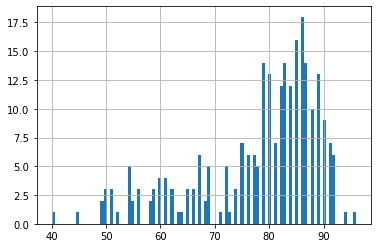

In [51]:
df["Fuzzy_token_set_ratio_Address_CNESvsGMN"].hist(bins=100)


###### Regra para deletar endereços que não fazem sentido baseado no limite de fuzzy


In [52]:
for index,row in df.iterrows():
    if row["Fuzzy_token_set_ratio_Address_CNESvsGMN"]<69:
        df.loc[index,'gmapsAddress']=np.NaN
        df.loc[index,"Fuzzy_token_set_ratio_Address_CNESvsGMN"]=np.NaN


In [53]:
df[df["Fuzzy_token_set_ratio_Address_CNESvsGMN"].notnull()].shape[0]

206

In [54]:
df_g = df[['gmapsCompanyName','gmapsAddress','gmapsTelephone','# Ratings GMN','URL GMN','URL Site','Fuzzy_token_set_ratio_Nome_CNESvsGMN','Fuzzy_token_set_ratio_Nome_CNESvsGMN']]

In [60]:
df_g['URL Site'].nunique()

222

# CNES vs Transunion

In [54]:
#Razão Social
df[['Razão Social','Razao_Social_transunion']].info()
df['Razão Social'] = df['Razão Social'].astype(str)
df['Razao_Social_transunion'] = df['Razao_Social_transunion'].astype(str)
df[['Razão Social','Razao_Social_transunion']].sample(5)

for index,row in df.iterrows():
    if row['Razao_Social_transunion']!='nan':
        df.loc[index, "Fuzzy_Razão_CNESvsTransunion"] =  fuzz.ratio(unidecode(row['Razão Social'].lower()),unidecode(row['Razao_Social_transunion'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_Razão_CNESvsTransunion"] =  fuzz.partial_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['Razao_Social_transunion'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_Razão_CNESvsTransunion"] =  fuzz.token_sort_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['Razao_Social_transunion'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_Razão_CNESvsTransunion"] =  fuzz.token_set_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['Razao_Social_transunion'].lower()))
# df[['Razão Social','Razao_Social_transunion','Fuzzy_Razão_CNESvsTransunion',"Fuzzy_partial_ratio_Razão_CNESvsTransunion","Fuzzy_token_sort_ratio_Razão_CNESvsTransunion","Fuzzy_token_set_ratio_Razão_CNESvsTransunion"]][df['Razao_Social_transunion']!='nan'].sort_values(by='Fuzzy_Razão_CNESvsTransunion',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Razão Social             21053 non-null  object
 1   Razao_Social_transunion  400 non-null    object
dtypes: object(2)
memory usage: 329.1+ KB


In [55]:
df[['Razão Social','Razao_Social_transunion','Fuzzy_Razão_CNESvsTransunion']][df['Razao_Social_transunion']!='nan'].sort_values(by='Fuzzy_Razão_CNESvsTransunion',ascending=False)


,Razão Social,Razao_Social_transunion,Fuzzy_Razão_CNESvsTransunion
140,GAIA CLINICA DE PSICOLOGIA E ESPECIALIDADES ME...,GAIA CLINICA DE PSICOLOGIA E ESPECIALIDADES ME...,100.0
14194,CENTRO PSICOTERAPICO LTDA,CENTRO PSICOTERAPICO LTDA,100.0
14631,CIPP CENTRO INTEGRADO DE PSIQUIATRIA E PSICOLO...,CIPP CENTRO INTEGRADO DE PSIQUIATRIA E PSICOLO...,100.0
14622,WHBOT SAUDE PLENA E MEDICINA LTDA,WHBOT SAUDE PLENA E MEDICINA LTDA,100.0
14584,PACTO POA PROGRAMA DE AUXILIO COMUNITARIO TERA...,PACTO POA PROGRAMA DE AUXILIO COMUNITARIO TERA...,100.0
...,...,...,...
7150,CSM CENTRO ESPECIALIZADO EM SAUDE MENTAL E GER...,CSM CENTRO ESPECIALIZADO EM SAUDE MENTAL E GER...,100.0
6997,CENTRO MEDICO MADRID LTDA,CENTRO MEDICO MADRID LTDA,100.0
6987,UP UNIDADE DE PSQUIATRIA LTDA EPP,UP UNIDADE DE PSQUIATRIA LTDA EPP,100.0
6914,CLIMEPE CLINICA DE MEDICINA PSICOLOGIA E ESP LTDA,CLIMEPE CLINICA DE MEDICINA PSICOLOGIA E ESP LTDA,100.0


In [56]:
df[['Razão Social','Razao_Social_transunion','Fuzzy_Razão_CNESvsTransunion']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Razão Social                  21053 non-null  object 
 1   Razao_Social_transunion       21053 non-null  object 
 2   Fuzzy_Razão_CNESvsTransunion  400 non-null    float64
dtypes: float64(1), object(2)
memory usage: 493.6+ KB


In [57]:
df['Razao_Social_transunion'] = df['Razao_Social_transunion'].apply(lambda x: x.replace('nan',''))


100.0    400
Name: Fuzzy_Razão_CNESvsTransunion, dtype: int64

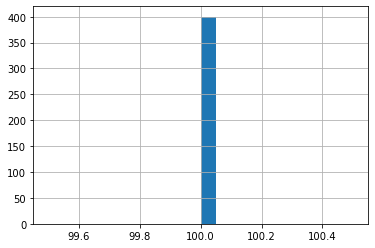

In [58]:
df["Fuzzy_Razão_CNESvsTransunion"].hist(bins=20)
df["Fuzzy_Razão_CNESvsTransunion"].value_counts()


# CNES vs Escavador

In [59]:
df[['Razão Social','nome_escavador']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Razão Social    21053 non-null  object
 1   nome_escavador  21053 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


In [60]:
#Razão Social
df[['Razão Social','nome_escavador']].info()
df['Razão Social'] = df['Razão Social'].astype(str)
df['nome_escavador'] = df['nome_escavador'].astype(str)
# df[['Razão Social','nome_escavador']].sample(5)

for index,row in df.iterrows():
    if row['nome_escavador']!='nan':
        df.loc[index, "Fuzzy_Razão_CNESvsEscavador"] =  fuzz.ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome_escavador'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_Razão_CNESvsTransunion"] =  fuzz.partial_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome_escavador'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_Razão_CNESvsTransunion"] =  fuzz.token_sort_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome_escavador'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_Razão_CNESvsTransunion"] =  fuzz.token_set_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome_escavador'].lower()))
# df[['Razão Social','nome_escavador','Fuzzy_Razão_CNESvsTransunion',"Fuzzy_partial_ratio_Razão_CNESvsTransunion","Fuzzy_token_sort_ratio_Razão_CNESvsTransunion","Fuzzy_token_set_ratio_Razão_CNESvsTransunion"]][df['nome_escavador']!='nan'].sort_values(by='Fuzzy_Razão_CNESvsTransunion',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Razão Social    21053 non-null  object
 1   nome_escavador  21053 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


In [61]:
df[['Razão Social','nome_escavador',"Fuzzy_Razão_CNESvsEscavador"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Razão Social                 21053 non-null  object 
 1   nome_escavador               21053 non-null  object 
 2   Fuzzy_Razão_CNESvsEscavador  21053 non-null  float64
dtypes: float64(1), object(2)
memory usage: 493.6+ KB


100.0    18321
98.0       680
97.0       456
96.0       219
95.0       192
         ...  
51.0         1
14.0         1
18.0         1
26.0         1
22.0         1
Name: Fuzzy_Razão_CNESvsEscavador, Length: 77, dtype: int64

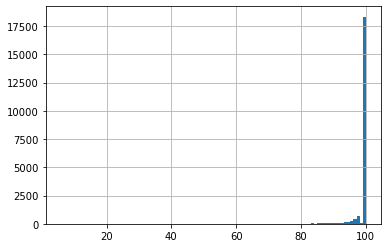

In [62]:
df["Fuzzy_Razão_CNESvsEscavador"].hist(bins=100)
df["Fuzzy_Razão_CNESvsEscavador"].value_counts()

# Extraindo a base

In [63]:
df.to_csv(r'App\base3.csv',index=False)